<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Эффективность-обогащения" data-toc-modified-id="Эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Эффективность обогащения</a></span></li><li><span><a href="#Признаки-тестовой-выборки" data-toc-modified-id="Признаки-тестовой-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки тестовой выборки</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Разные-этапы-очистки" data-toc-modified-id="Разные-этапы-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разные этапы очистки</a></span></li><li><span><a href="#Размеры-гранул" data-toc-modified-id="Размеры-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Подготовка-обучающих-и-целевых-признаков" data-toc-modified-id="Подготовка-обучающих-и-целевых-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка обучающих и целевых признаков</a></span></li><li><span><a href="#Поиск-модели" data-toc-modified-id="Поиск-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск модели</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Имеются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.style.use('ggplot')

Загрузим исходные данные и посмотрим на их размеры

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [5]:
print(data_train.shape, 
      data_test.shape,
      data_full.shape)

(14149, 87) (5290, 53) (19439, 87)


### Эффективность обогащения

Проверим корректность расчета эффективности обогащения на примере 'rougher.output.recovery'. По заданной формуле значение этого признака зависит от концентрации золота после очистки ('rougher.output.concentrate_au'), концентрации золота до очистки ('rougher.input.feed_au') и доли золота в отвальном хвосте ('rougher.output.tail_au'). Расчетное значение назовем 'rougher.output.recovery_calc'.

In [6]:
data_train['rougher.output.recovery_calc'] = ((data_train['rougher.output.concentrate_au'] *
                                              (data_train['rougher.input.feed_au'] -
                                               data_train['rougher.output.tail_au'])) /
                                              (data_train['rougher.input.feed_au'] *
                                              (data_train['rougher.output.concentrate_au'] -
                                               data_train['rougher.output.tail_au']))) * 100

Сравним полученный результат с указанной в датасете эффектвностью метрикой MAE.

In [7]:
print('MAE расчетной и указанной в данных эффективности обогащения составляет {}'.format(mean_absolute_error(
    data_train['rougher.output.recovery_calc'],
    data_train['rougher.output.recovery'])))

MAE расчетной и указанной в данных эффективности обогащения составляет 9.73512347450521e-15


**Расчетные и фактические параметры практически полностью сходятся.**

### Признаки тестовой выборки

В обучающей выборке и исходных данные 87 столбцов, а в тестовой выборке 53. Посмотрим, какие данные отсутствуют в тестовой выборке.

In [8]:
data_train[data_train.columns[~data_train.columns.isin(data_test.columns)]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


**Вероятно, это параметры, которые по технологическому процессу рассчитываются позже и неизвестны на момент обработки сырья.**

### Обработка данных

Заменим тип данных у даты в выборках на корректный

In [9]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

Мы знаем, что соседние по времени параметры часто похожи. Поэтому пропуски можно заполнить соседними параметрами. Но сперва надо убедиться в том, что строки в наших данных расположены в хронологическом порядке.

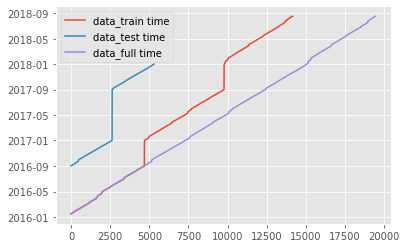

In [10]:
plt.plot(data_train['date'], label='data_train time')
plt.plot(data_test['date'], label='data_test time')
plt.plot(data_full['date'], label='data_full time')
plt.legend()
plt.show()

Как видно из графиков, данные расположены в хронологическом порядке. Применим метод ffill() для заполнения пропусков.

In [11]:
print('Количество пропущенных значений в обучающей выборке до обработки:', data_train.isna().sum().sum())
print('Количество пропущенных значений в тестовой выборке до обработки:', data_test.isna().sum().sum())
print('Количество пропущенных значений в исходных данных до обработки:', data_full.isna().sum().sum())

Количество пропущенных значений в обучающей выборке до обработки: 4100
Количество пропущенных значений в тестовой выборке до обработки: 90
Количество пропущенных значений в исходных данных до обработки: 4481


In [12]:
data_train = data_train.ffill()
data_test = data_test.ffill()
data_full = data_full.ffill()

In [13]:
print('Количество пропущенных значений в обучающей выборке после обработки:', data_train.isna().sum().sum())
print('Количество пропущенных значений в тестовой выборке после обработки:', data_test.isna().sum().sum())
print('Количество пропущенных значений в исходных данных после обработки:', data_full.isna().sum().sum())

Количество пропущенных значений в обучающей выборке после обработки: 0
Количество пропущенных значений в тестовой выборке после обработки: 0
Количество пропущенных значений в исходных данных после обработки: 0


**Пропуски заполнены успешно. Данные готовы к дальнейшему анализу.**

## Анализ данных

### Разные этапы очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, а именно 'rougher.input', 'rougher.output', 'primary_cleaner.output' и 'final_output'.

In [14]:
stages = pd.DataFrame({'Au': [data_train['rougher.input.feed_au'].mean(),
                    data_train['rougher.output.concentrate_au'].mean(),
                    data_train['primary_cleaner.output.concentrate_au'].mean(),
                    data_train['final.output.concentrate_au'].mean()],
             'Ag': [data_train['rougher.input.feed_ag'].mean(),
                    data_train['rougher.output.concentrate_ag'].mean(),
                    data_train['primary_cleaner.output.concentrate_ag'].mean(),
                    data_train['final.output.concentrate_ag'].mean()],
             'Pb': [data_train['rougher.input.feed_pb'].mean(),
                    data_train['rougher.output.concentrate_pb'].mean(),
                    data_train['primary_cleaner.output.concentrate_pb'].mean(),
                    data_train['final.output.concentrate_pb'].mean()]},
            index=['rougher.input', 'rougher.output', 
                  'primary_cleaner.output', 'final.output'])

In [15]:
stages

,Au,Ag,Pb
rougher.input,7.866577,8.579195,3.505465
rougher.output,19.439958,11.775812,7.664555
primary_cleaner.output,32.386836,8.200916,9.568544
final.output,44.003792,5.141921,10.132848


<AxesSubplot:>

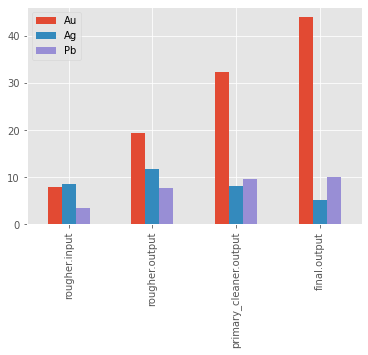

In [16]:
stages.plot(kind='bar')

**Концентрация золота в сырье стабильно растет после каждой стадии обработки, в то время как рост концентрации свинца замедляется, а концентрация серебра после первого этапа очистки начинает снижаться. Похоже, что весь технологический процесс направлен на увеличение концентрации только золота.**

### Размеры гранул

Сравним размеры гранул на входе во флотационную установку 'rougher.input.feed_size' и их распределение в обучающей и тестовой выборках. 

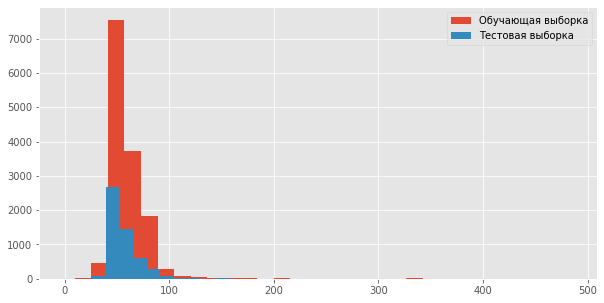

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data_train['rougher.input.feed_size'], bins=30, label='Обучающая выборка')
plt.hist(data_test['rougher.input.feed_size'], bins=30, label='Тестовая выборка')
plt.legend()
plt.show()

**Как видно из гистограмм, размеры гранул и их распределения похожи, оценка модели будет корректной.**

(0.0, 200.0)

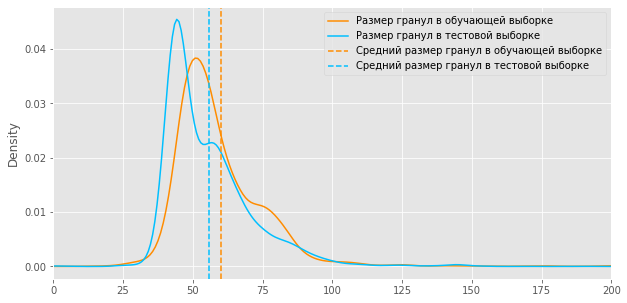

In [18]:
plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
ax = data_train['rougher.input.feed_size'].plot.kde(color='darkorange', label='Размер гранул в обучающей выборке')
ax = data_test['rougher.input.feed_size'].plot.kde(color='deepskyblue', label='Размер гранул в тестовой выборке')
ax.axvline(data_train['rougher.input.feed_size'].mean(), color="darkorange", linestyle="dashed",
           label='Средний размер гранул в обучающей выборке')
ax.axvline(data_test['rougher.input.feed_size'].mean(), color="deepskyblue", linestyle="dashed",
          label='Средний размер гранул в тестовой выборке')
plt.legend()
plt.xlim(0, 200)

In [19]:
print('Нулевая гипотеза H0 - размеры гранул в обучающей и тестовой выборках равны')
print('Альтерантиваня гипотеза H1 - в выборках гранулы разного размера')
print('Средний размер гранул в обучающей выборке: {:.2f}'.format(data_train['rougher.input.feed_size'].mean()))
print('Средний размер гранул в тестовой выборке: {:.2f}'.format(data_test['rougher.input.feed_size'].mean()))
alpha = 0.05
result = st.ttest_ind(data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size'])
print('pvalue = ', result.pvalue)
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
if result.pvalue >= 0.05:
    print('Не отвергаем нулевую гипотезу')

Нулевая гипотеза H0 - размеры гранул в обучающей и тестовой выборках равны
Альтерантиваня гипотеза H1 - в выборках гранулы разного размера
Средний размер гранул в обучающей выборке: 60.24
Средний размер гранул в тестовой выборке: 55.95
pvalue =  1.6081245670851188e-33
Отвергаем нулевую гипотезу


### Суммарная концентрация веществ

Рассмотрим суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Создадим столбцы 'rougher.input_total', 'rougher.output_total' и 'final.output_total', в которых будет суммарная концентрация веществ по соответствующим стадиям.

In [20]:
data_train['rougher.input_total'] = (data_train['rougher.input.feed_ag'] +
                                     data_train['rougher.input.feed_pb'] +
                                     data_train['rougher.input.feed_sol'] +
                                     data_train['rougher.input.feed_au'])
data_train['rougher.output_total'] = (data_train['rougher.output.concentrate_ag'] +
                                      data_train['rougher.output.concentrate_pb'] +
                                      data_train['rougher.output.concentrate_sol'] +
                                      data_train['rougher.output.concentrate_au'])
data_train['final.output_total'] = (data_train['final.output.concentrate_ag'] +
                                    data_train['final.output.concentrate_pb'] +
                                    data_train['final.output.concentrate_sol'] +
                                    data_train['final.output.concentrate_au'])

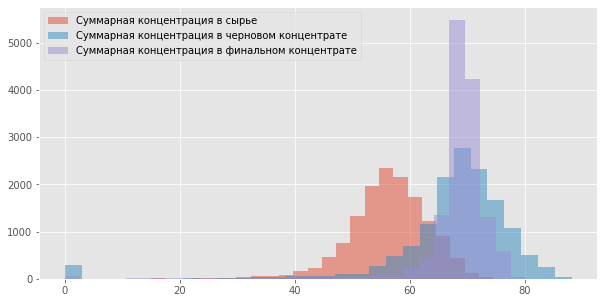

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(data_train['rougher.input_total'], bins=30, alpha=0.5, label='Суммарная концентрация в сырье')
plt.hist(data_train['rougher.output_total'], bins=30, alpha=0.5, label='Суммарная концентрация в черновом концентрате')
plt.hist(data_train['final.output_total'], bins=30, alpha=0.5, label='Суммарная концентрация в финальном концентрате')
plt.legend()
plt.show()

In [22]:
print('Количество строк с нулевой концентрацией веществ в сырье:', (data_train['rougher.input_total']==0).sum())
print('Количество строк с нулевой концентрацией веществ в черновом концентрате:', (data_train['rougher.output_total']==0).sum())
print('Количество строк с нулевой концентрацией веществ в финальном концентрате:', (data_train['final.output_total']==0).sum())

Количество строк с нулевой концентрацией веществ в сырье: 0
Количество строк с нулевой концентрацией веществ в черновом концентрате: 297
Количество строк с нулевой концентрацией веществ в финальном концентрате: 58


**Можно отметить, что в черновом и финальном концентратах появляется сырье с нулевой концентрацией веществ. Вероятно, это связано с тем, что из-за технологических ошибок в процессе подготовки сырья полезные вещества удалились в отвальных хвостах. Чтобы исключить обучение нашей модели на браке, удалим эти строчки из обучающей выборки.**

In [23]:
data_train = data_train[(data_train['rougher.output_total']!=0) & (data_train['final.output_total']!=0)]

## Модель

### sMAPE

Напишем функцию, которая принимает на вход результаты моделирования и возвращает метрику sMAPE

In [24]:
def smape(true, predict):
    rougher_y = true['rougher.output.recovery']
    rougher_y_pred = predict[:, 0]
    final_y = true['final.output.recovery']
    final_y_pred = predict[:, 1]
    smape_rougher = 1 / len(true) * ((abs(rougher_y - rougher_y_pred) / ((abs(rougher_y) + abs(rougher_y_pred))/2)) * 100).sum()
    smape_final = 1 / len(true) * ((abs(final_y - final_y_pred) / ((abs(final_y) + abs(final_y_pred))/2)) * 100).sum()
    smape = .25 * smape_rougher + .75 * smape_final
    return smape

### Подготовка обучающих и целевых признаков

Целевые признаки 'rougher.output.recovery' и 'final.output.recovery' не даны в тестовой выборке. Чтобы оценить качество модели, добавим эти признаки из исходных данных. Объединять данные будем по столбцу 'date'.

In [25]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                            how='left', left_on='date', right_on='date')

Выделим из выборок обучающие и целевые признаки

In [26]:
data_train_features = data_train[data_test.columns].drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])
data_train_target = data_train[['rougher.output.recovery', 'final.output.recovery']]
data_test_features = data_test.drop(columns=['date', 'rougher.output.recovery', 'final.output.recovery'])
data_test_target = data_test[['rougher.output.recovery', 'final.output.recovery']]

Промасштабируем данные

In [27]:
scaler = StandardScaler()
scaler.fit(data_train_features)
pd.options.mode.chained_assignment = None
data_train_features = scaler.transform(data_train_features)
data_test_features = scaler.transform(data_test_features)

### Поиск модели

Выполним поиск оптимальных гиперпараметров методом GridSearchCV. Выбор наилучшей модели будет происходить по результатам работы функции 'sMAPE'.

In [28]:
smape_scorer = make_scorer(smape, greater_is_better=False)

#### LinearRegression 

In [29]:
model = LinearRegression()
scores = cross_val_score(model, data_train_features, data_train_target, scoring=smape_scorer, cv=5)
print('sMAPE модели LinearRegression: {:.2f}'.format(abs(scores.mean())))

sMAPE модели LinearRegression: 10.06


#### DecisionTreeRegressor

In [30]:
%%time
model = DecisionTreeRegressor(random_state=12345)
parametrs = {'max_depth': range (1, 16),}
grid_tree = GridSearchCV(model, param_grid=parametrs, cv=5, scoring=smape_scorer)
grid_tree.fit(data_train_features, data_train_target)
print('Лучший результат модели DecisionTreeRegressor {:.2f} при глубине дерева {}'.format(
    abs(grid_tree.best_score_), grid_tree.best_params_['max_depth']))

Лучший результат модели DecisionTreeRegressor 8.99 при глубине дерева 1
CPU times: user 40.1 s, sys: 0 ns, total: 40.1 s
Wall time: 4min 28s


#### RandomForestRegressor

In [31]:
%%time
model = RandomForestRegressor(random_state=12345)
parametrs = {'n_estimators': range (10, 101, 10),
             'max_depth': range (1, 11),}
grid_forest = GridSearchCV(model, param_grid=parametrs, cv=5, scoring=smape_scorer)
grid_forest.fit(data_train_features, data_train_target)
print('Лучший результат модели RandomForestRegressor {:.2f} при глубине дерева {} и количестве деревьев {}'.format(
    abs(grid_forest.best_score_), grid_forest.best_params_['max_depth'], grid_forest.best_params_['n_estimators']))

Лучший результат модели RandomForestRegressor 8.75 при глубине дерева 3 и количестве деревьев 60
CPU times: user 1h 33min 1s, sys: 4.6 s, total: 1h 33min 6s
Wall time: 3h 23min 7s


### Проверка на тестовой выборке

Проверим модель на тестовой выборке и выведем полученный sMAPE.

In [32]:
smape_test = smape(data_test_target, grid_forest.predict(data_test_features))
print('Результат работы лучшей модели на тестовой выборке метрикой sMAPE составил', smape_test)

Результат работы лучшей модели на тестовой выборке метрикой sMAPE составил 9.043608377126288


## Вывод

**В ходе работы были изучены, подготовлены и проверены на корректность данные по обработке золотой руды. Проанализированы концентрация веществ на разных стадиях очистки, размеры гранул в обучающей и тестовой выборках, суммарная концентрация вещест на разных стадиях. Созданы модели линейной регрессии, дерева решений и случайного леса, оптимальные гиперпараметры для которых определены методом GridSearchCV. Работа модели проверена на тестовой выборке, итоговый коэффициент sMAPE составил 9,04.**